In [1]:
import drrdTools as dr
#import drrdTools as dr
import numpy as np

In [2]:
# Information for the raw data file name. Tipically the file
# names are PPPNNN.SSS, where PPP are three digits for the
# prefix (ex. AB1) reflecting the experiment; NNN are the 
# three digits for the animal ID, (064 if animal is 64); and 
# SSS are the three digits for the session (001 for session 1). 
# Example of a filename: AB1064.001
prefix= 'AB1'
animalID= 65
session = 2

# modify the line reflect to your data path
dataPathAB = '/home/mbreyes/ufabc/dados/AB/data/raw/AB1/'
dataPathAH = '/home/mbreyes/Dropbox/ReyesTesti/drrd/dadosBrutos/AH/'

________________________________________________________________________________
539  trials found
[0.  0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2]
Rat7  Trials:539  Reinforced:217  Non-Reinforced:322  Invalid:0



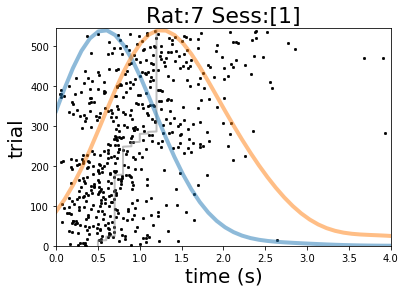

In [3]:
# Extract the data from a file and plot the response during the session
D = dr.drrd(prefix= 'AB1', animalID= 7, sessions = 1, dataPath = dataPathAB)

________________________________________________________________________________
459  trials found
[0.  1.2]
Rat65  Trials:459  Reinforced:286  Non-Reinforced:173  Invalid:0



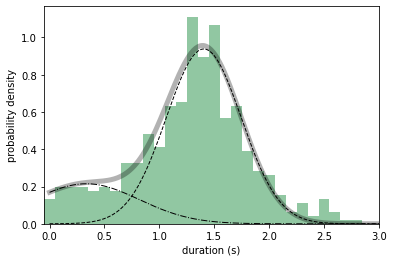

In [4]:
# Example of how to fit a double gaussian
pars = dr.fit_single_animal(animalID,session,plotFlag=True,indexes=(None,None),ax=None, prefix='AB1', dataPath= dataPathAB)

________________________________________________________________________________
586  trials found
[0.    0.7   0.702 0.8   0.9   1.    1.1   1.2  ]
Trying to fix inconsistencies in prime times
Successfully fixed
[0.7]
Rat16  Trials:586  Reinforced:219  Non-Reinforced:367  Invalid:0



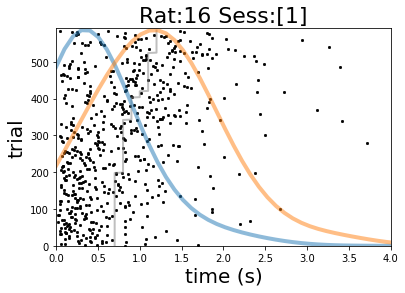

In [5]:
D = dr.drrd('AB1',animalID= 16, sessions= [1], dataPath= dataPathAB, events_to_eliminate= [5,9, 16, 26])

________________________________________________________________________________
821  trials found
[0.  1.2 2. ]
Rat79  Trials:821  Reinforced:150  Non-Reinforced:671  Invalid:0



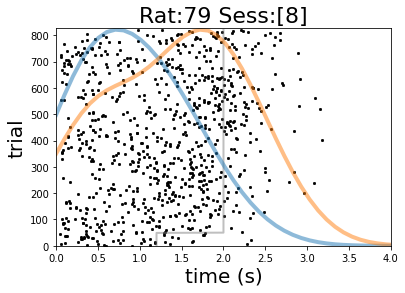

In [6]:
D = dr.drrd('AH0',animalID= 79, sessions= [8], dataPath= dataPathAH, events_to_eliminate= [5,9,16,2])

________________________________________________________________________________
1071  trials found
[0.  1.2 2. ]
Rat81  Trials:1071  Reinforced:93  Non-Reinforced:978  Invalid:0



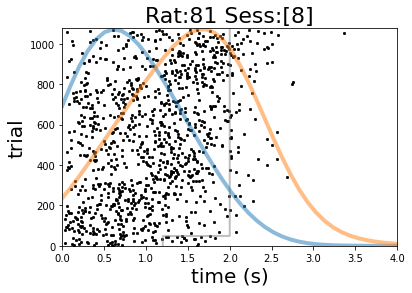

In [7]:
D = dr.drrd('AH0',animalID= 81, sessions= [8], dataPath= dataPathAH, events_to_eliminate= [5,9,16,26])

________________________________________________________________________________
1071  trials found
[0.  1.2 2. ]
Rat81  Trials:1071  Reinforced:93  Non-Reinforced:978  Invalid:0



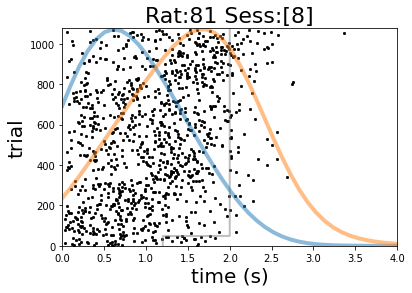

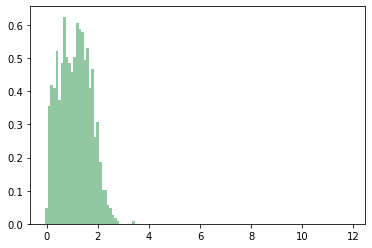

In [74]:
# getting data from file
x = np.arange(0,12,0.1)
D = dr.drrd('AH0',animalID= 81, sessions= [8], dataPath= dataPathAH, events_to_eliminate= [5,9,16,26])
y = dr.calc_histogram(D[:, 0], x)

In [75]:
import pandas as pd

In [76]:
df = pd.DataFrame(D, columns= ['dt', 'iti', 'primed', 'valid', 'phase', 'session'])

In [77]:
df.iloc[df.query('primed == 1').index + 1,:]

,dt,iti,primed,valid,phase,session
1,0.606,2.760,0.0,1.0,1.2,8.0
11,0.198,0.238,0.0,1.0,1.2,8.0
21,0.948,1.186,0.0,1.0,1.2,8.0
25,1.708,1.808,1.0,1.0,1.2,8.0
26,0.856,1.060,0.0,1.0,1.2,8.0
...,...,...,...,...,...,...
1055,0.806,2.366,0.0,1.0,2.0,8.0
1059,0.056,4.636,0.0,1.0,2.0,8.0
1061,1.118,1.600,0.0,1.0,2.0,8.0
1065,1.188,2.012,0.0,1.0,2.0,8.0


In [78]:
D2 = np.array(df.iloc[df.query('primed == 1').index + 1,:])
D2.round(3)

array([[6.060e-01, 2.760e+00, 0.000e+00, 1.000e+00, 1.200e+00, 8.000e+00],
       [1.980e-01, 2.380e-01, 0.000e+00, 1.000e+00, 1.200e+00, 8.000e+00],
       [9.480e-01, 1.186e+00, 0.000e+00, 1.000e+00, 1.200e+00, 8.000e+00],
       [1.708e+00, 1.808e+00, 1.000e+00, 1.000e+00, 1.200e+00, 8.000e+00],
       [8.560e-01, 1.060e+00, 0.000e+00, 1.000e+00, 1.200e+00, 8.000e+00],
       [9.840e-01, 1.756e+00, 0.000e+00, 1.000e+00, 1.200e+00, 8.000e+00],
       [1.960e-01, 1.600e-02, 0.000e+00, 1.000e+00, 1.200e+00, 8.000e+00],
       [7.220e-01, 1.506e+00, 0.000e+00, 1.000e+00, 1.200e+00, 8.000e+00],
       [1.458e+00, 3.908e+00, 1.000e+00, 1.000e+00, 1.200e+00, 8.000e+00],
       [6.900e-01, 1.562e+00, 0.000e+00, 1.000e+00, 1.200e+00, 8.000e+00],
       [1.238e+00, 2.454e+00, 1.000e+00, 1.000e+00, 1.200e+00, 8.000e+00],
       [1.268e+00, 4.764e+00, 1.000e+00, 1.000e+00, 1.200e+00, 8.000e+00],
       [1.662e+00, 6.696e+00, 1.000e+00, 1.000e+00, 1.200e+00, 8.000e+00],
       [1.372e+00, 2.292e

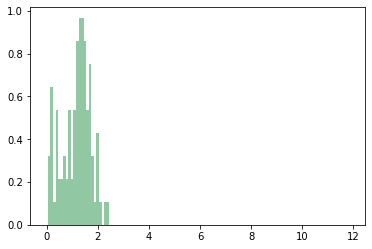

In [79]:
y2 = dr.calc_histogram(D2[:, 0], x)

In [84]:
import matplotlib.pyplot as plt

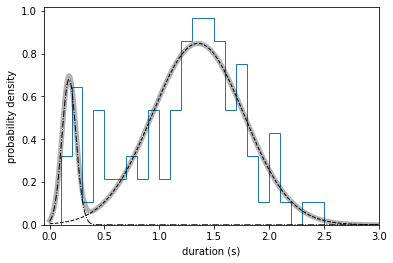

In [92]:
dr.fit_single_animal_from_matrix(D2,y2, 81, 8, plotFlag=True, indexes=(0, None), ax=None, prefix='AL0')
plt.stairs(y2[:-1],x)

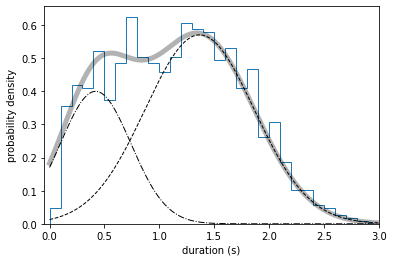

In [93]:
dr.fit_single_animal_from_matrix(D,y, 81, 8, plotFlag=True, indexes=(0, None), ax=None, prefix='AL0')
plt.stairs(y[:-1],x)

In [8]:
bad_animals  = [86, 87, 88, 89, 89, 89, 89, 103, 106, 107, 109] 
bad_sessions = [21,  1,  3,  2,  3, 18, 20,  12,   1,   1,   9]

In [9]:
print(bad_animals[k],bad_sessions[k])
D = drrd(prefix= 'AH0', animalID= bad_animals[k], sessions= [bad_sessions[k]], dataPath= dataPathAH, events_to_eliminate= None)
D

NameError: name 'k' is not defined

In [ ]:
D

In [ ]:
events_to_eliminate= [5,9,16,26]

In [ ]:
data = med2tec(dataPathAH + 'AH0081.008')
# data[1:40]
#data_first_start

In [ ]:
data = eliminate_beginning(data, startEvent = 11)
data

In [ ]:
trial_begin_code= 1

print(data[:20])

index_first_begin = [i for i,entry in enumerate(data) if entry[1]== trial_begin_code][0]

[data[0]] + [k for i,k in enumerate(data) if i>=index_first_begin ]


In [ ]:
lst = [1,1,2,1, 2,3,4]
lst.index(1)

In [ ]:
data[1:2]

In [ ]:
data = eliminate_events(data, events_to_eliminate = events_to_eliminate)

data[:200]

In [ ]:
data = fix_clock_reset(np.array(data))
data




In [ ]:
np.unique([k[1] for k in data])

In [ ]:
begin_of_session = [i for i,k in enumerate(data) if k[1] == 11][0]

data = data[begin_of_session:]

data[:10]

In [ ]:

data = fix_clock_reset(np.array(data))

beg_and_reinf = [k for k in data if k[1] in [1,18]]

reinf_index = [i for i,k in enumerate(beg_and_reinf) if k[1] == 18]

allCrit = []

for k in reinf_index: 
    crit = beg_and_reinf[k][0] - beg_and_reinf[k-1][0]
    crit = np.round(crit,2)
    allCrit.append(crit)
allCrit

In [ ]:

data = fix_clock_reset(np.array(data))

beg_and_reinf = [k for k in data if k[1] in [1,18]]

reinf_index = [i for i,k in enumerate(beg_and_reinf) if k[1] == 18]

allCrit = []

for k in reinf_index: 
    crit = beg_and_reinf[k][0] - beg_and_reinf[k-1][0]
    crit = np.round(crit,2)
    allCrit.append(crit)
allCrit

In [ ]:
beg_and_reinf = [k for k in data if k[1] == 1 or k[1] == 18]

eighteens = [i for i,k in enumerate(beg_and_reinf) if k[1] == 18]

allCrit = []

for k in eighteens: 
    crit = beg_and_reinf[k][0] - beg_and_reinf[k-1][0]
    crit = np.round(crit,2)
    allCrit.append(crit)
allCrit

In [ ]:
data_first_start = [data[k] for k in range(len(data)) if data[k][1] == 1][0]
index_first_start = data.index(data_first_start)

In [ ]:
data[0][1]

In [ ]:
[data[k] for k in range(len(data)) if not (data[k][1] == 3 and k <= index_first_start)]

In [ ]:
data = np.array(data)                # transforms data to numpy array

# identifying in which index the first trial begins.
index_first_start = np.where(data[:,1]==1)[0][0]
index_first_end   = np.where(data[:,1]==3)[0][0]
print(index_first_start,index_first_end)

In [ ]:
data[data[:,1] == 3 ,:][:index_first_start]

In [ ]:
# data = eliminate_events(data, events_to_eliminate = events_to_eliminate)
data = np.array(data)                # transforms data to numpy array


startIndex    = np.array([i for i in range(len(data)) if data[i, 1] ==  1])  # code that indicates that the lever was pressed
endIndex      = np.array([i for i in range(len(data)) if data[i, 1] ==  3])  # instant when the lever was released
primeIndex    = np.array([i for i in range(len(data)) if data[i, 1] == 18])  # moment when the trial reached the criterion
lightOnIndex  = np.array([i for i in range(len(data)) if data[i, 1] == 11])  # when light was turned on (beginning of session)
lightOffIndex = np.array([i for i in range(len(data)) if data[i, 1] == 21])  # when light was turned off (end of session)
    
phaseAdvIndex = np.array([i for i in range(len(data)) if data[i, 1] == 17])  # moment of phase advance (criterion increased)
phaseBckIndex = np.array([i for i in range(len(data)) if data[i, 1] == 27])  # moment of phase retreat (criterion decreased)


In [ ]:
# small correction for a bug in the med-pc file ---
data = dr.fix_clock_reset(data)
data[:15,:]

In [ ]:

data

In [ ]:
lightOnIndex

In [ ]:
startIndex

In [ ]:
lightOnIndex  = np.array([i for i in range(len(data)) if data[i, 1] == 11])  # when light was turned on (beginning of session)
lightOnIndex

In [ ]:
lightOffIndex  = np.array([i for i in range(len(data)) if data[i, 1] == 21])  # when light was turned on (beginning of session)
lightOffIndex

In [ ]:
data = M

In [ ]:
last_occurrence = [M[k] for k in range(len(M)) if M[k][1] == 11][-1]
cuttoff_index = M.index(last_occurrence)

A = M[cuttoff_index:]
A

In [ ]:
A = [M[k] for k in range(len(M)) if M[k][1] != 9]
A

In [ ]:
D = dr.drrd('AH0',animalID= 79, sessions= [11], dataPath= dataPathAH)
D

In [ ]:
data = med2tec(dataPath+'AB1014.001')
data = np.array(data)
data = fix_clock_reset(data)

#making sure data starts with 1 and ends with a 3
nini = np.where(data[:,1]==1)[0][0]   # finds the first lever press
nend = np.where(data[:,1]==3)[0][-1]  # finds the last lever release
data = data[nini:nend+1,:]

dt  = data[ data[:, 1] == 3, 0]     - data[ data[:, 1] == 1, 0]
iti = data[ data[:, 1] == 1, 0][1:] - data[ data[:, 1] == 3, 0][0:-1]

iti = np.append(iti,np.nan)


# --- Indexes for each of the output variable columns
dtCol      = 0  # column zero contains the response duration (dt)
itiCol     = 1  # column one contains the intertrial interval (iti)
primedCol  = 2
validCol   = 3
phaseCol   = 4
sessionCol = 5  # session variable column index
Ncols = 6


# --- look for indexes of temporal events ---
startIndex    = np.array([i for i in range(len(data)) if data[i, 1] ==  1])  # code 1 indicates that the lever was pressed
endIndex      = np.array([i for i in range(len(data)) if data[i, 1] ==  3])  # instant when the lever was released
primeIndex    = np.array([i for i in range(len(data)) if data[i, 1] == 18])  # moment when the trial reached the criterion
lightOnIndex  = np.array([i for i in range(len(data)) if data[i, 1] == 11])  # when light was turned on (beginning of session)
lightOffIndex = np.array([i for i in range(len(data)) if data[i, 1] == 21])  # when light was turned off (end of session)
phaseAdvIndex = np.array([i for i in range(len(data)) if data[i, 1] == 17])  # moment of phase advance (criterion increased)
phaseBckIndex = np.array([i for i in range(len(data)) if data[i, 1] == 27])  # moment of phase retreat (criterion decreased)

# eliminating the last trial in case it was incomplete
startIndex = startIndex[0:len(endIndex)]  
startIndex

print('_' * 80)
print(len(endIndex),' trials found')

# --- checking if there was at least one trial, 
# --- otherwise stops the routine end return empty vector
# if len(startIndex) == 0:
#     print('No trials recorded')
#     return ([])

# --- searching for trials in which the animals received food. We call these "primed" ----
primedTrials = np.array([startIndex[startIndex < i].size - 1 for i in primeIndex])

# --- searching for trials in which animals progressed or retreated phase
phaseAdvTrials = np.array([startIndex[startIndex < i].size - 1 for i in phaseAdvIndex])
phaseBckTrials = np.array([startIndex[startIndex < i].size - 1 for i in phaseBckIndex])



In [ ]:
# completing data in case the lightOff event wasn't found
# includes a lightOff event in the last trial
if len(lightOnIndex) != len(lightOffIndex):
    if len(lightOnIndex) == len(lightOffIndex) + 1:
        lightOffIndex = np.append(lightOffIndex, startIndex[-1] + 1)
    else:
        print('Incompatible number of events')
#        return (-2)

In [ ]:
validTrials = np.array([], dtype=np.int64).reshape(0, )   # initiates empty vector to store all valid trials

for i in range(len(lightOnIndex)):
    Nu = np.array(len(startIndex[startIndex < lightOnIndex[i]]))
    print(Nu)
    Nv = np.array(len(startIndex[startIndex < lightOffIndex[i]]))
    validTrials = np.hstack([validTrials, range(Nu, Nv)])

validTrials = np.array(validTrials)  # transforms to numpy array
validTrials

In [ ]:
# --- search for valid trials in which animals were and were not reinforded ---
validPrimed    = np.intersect1d(validTrials, primedTrials)
validNonPrimed = np.setdiff1d  (validTrials, primedTrials)
invalid        = np.setdiff1d  (range(len(startIndex)), validTrials)

# --- Organizing data in one single matriz: D --- 
D = np.zeros((len(startIndex), Ncols))  # Initiates the vector for speed

# --- Calculating the duration of the lever presses ---
D[:  ,  dtCol] = data[endIndex, 0]       - data[startIndex, 0]     # time elapsed from press until relesase
D[:-1, itiCol] = data[startIndex[1:], 0] - data[endIndex[:-1], 0]  # time between release and press ( beginning of next trial)
D[-1 , itiCol] = np.nan                                            # the last trial has no ITI, stores NaN

# --- saving each data in respective column
if len(primedTrials) > 0: 
    D[primedTrials, primedCol] = 1  # sets to 1 all the trials that were primed

if len(validTrials) > 0:
    for k in validTrials: D[int(k), validCol] = 1

if len(phaseAdvTrials) > 0: 
    D[phaseAdvTrials, phaseCol] = 1

if len(phaseBckTrials) > 0: 
    D[phaseBckTrials, phaseCol] = -1

# D[:,phaseCol]               = np.cumsum(D[:,phaseCol])+iniPh
D[:, sessionCol] = session  # adds the session number to data (same for all lines)

# Getting the time where the rats exceeded the criterion time
# these are called primed trials, and occurr at the prime time.
# we can get the primed times by subtracting the data where the prime happened 
# from the event before, which necessarily is the lever press
primeTimes = [0] * D.shape[0]

for primed in primedTrials:
    thisIndex = startIndex[primed]
    primeTimes[primed] = np.round(data[thisIndex + 1, 0] - data[thisIndex, 0], decimals=5)

print(np.unique(primeTimes))
crit = extractCriterion(phAdv=D[:, phaseCol], primed=D[:, primedCol], primeTimes=primeTimes)
D[:, phaseCol] = crit

# --- printing output with the summary of the results ---
print(
    f'Rat{animalID}  Trials:{len(startIndex)}  Reinforced:{len(validPrimed)}  Non-Reinforced:{len(validNonPrimed)}  Invalid:{len(invalid)}\n')

# --- graphical part ---
if plotFlag:
    plotDrrd(D, filename)